<a href="https://colab.research.google.com/github/yogiraj542/activite/blob/main/cie_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('/content/Mall_Customers (1).csv')
data.head()
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [2]:
x=data.iloc[:,[3,4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

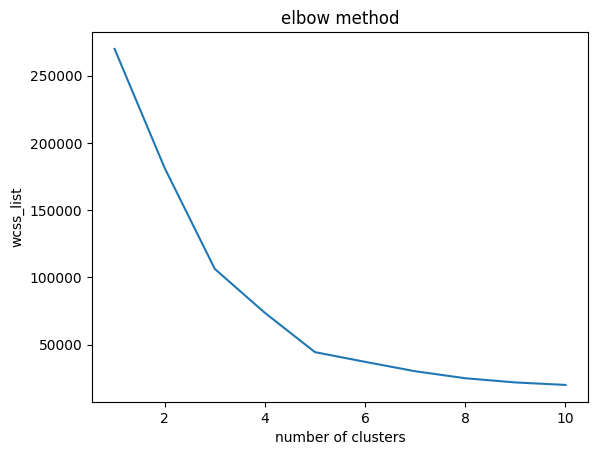

In [3]:
wcss_list=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss_list')
plt.show()

In [4]:
optimal_clusters=5
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 3, 0, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 5, 3, 5, 3,
       0, 3, 0, 3, 5, 9, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 5, 3, 5, 9,
       5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 2, 6, 2, 2, 6, 6, 6, 2, 6, 2, 6, 6, 6, 6, 2, 6, 6, 2, 6,
       6, 6, 2, 2, 6, 6, 2, 6, 2, 6, 6, 2, 6, 1, 2, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 7, 1, 7, 1, 7, 1, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8,
       7, 8], dtype=int32)

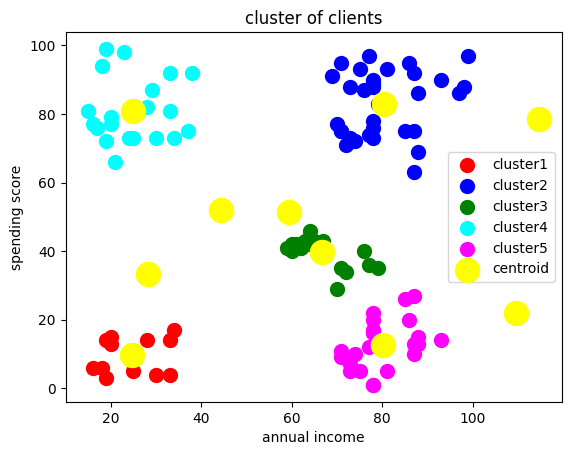

In [5]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='magenta',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title('cluster of clients')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()